(1080, 1920, 3)
355403
0
5
5


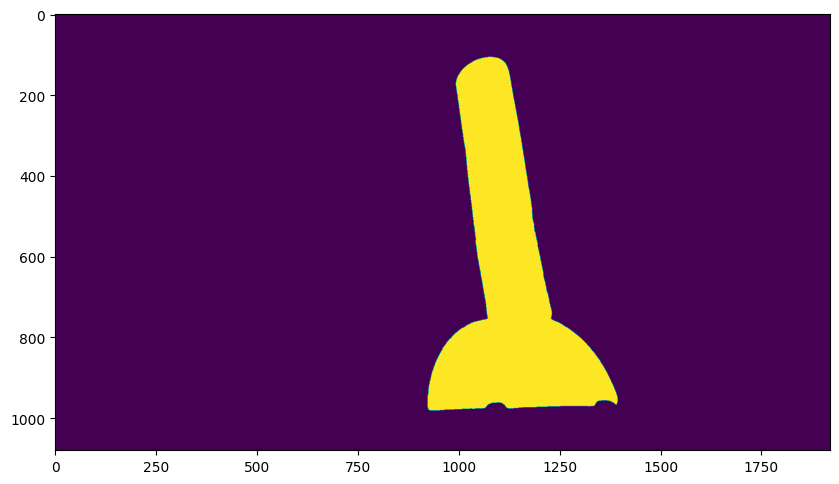

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

label_path = "original_labels/green_h_image1.txt"

img = cv2.imread("images/green_h_image1.png")
print(img.shape)

with open(label_path,"r") as f:
    lines = f.readlines()

height, width = 1080, 1920  # replace with your actual image dimensions
mask_list = []
class_list = []

for line in lines:
    line_arr = line.split()
    print(len(line_arr))
    if line_arr:  # make sure line is not empty
        class_list.append(int(line_arr[0]))
        mask = np.zeros((height, width))
        for i in range(1, len(line_arr), 2):
            x, y = round(float(line_arr[i])*(width-1)), round(float(line_arr[i+1])*(height-1))
            mask[y, x] = 1
        mask_list.append(mask)


mask_0 = mask_list[0]
plt.figure(figsize=(10,10))
plt.imshow(mask_0)

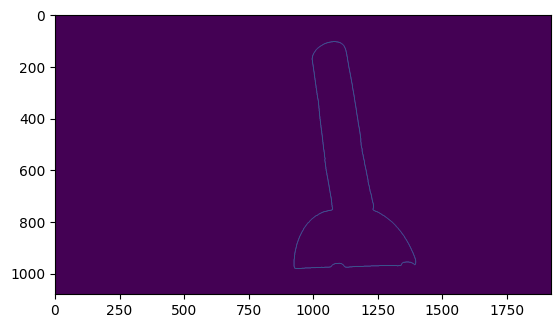

In [4]:
contour_list = []
for i in range(len(mask_list)):
    mask_pad = np.pad(mask_list[i], 1, mode='edge')
    res = np.clip(mask_pad - cv2.bitwise_and(mask_pad, np.roll(mask_pad, 1, 0)) + \
                mask_pad - cv2.bitwise_and(mask_pad, np.roll(mask_pad, -1, 0)) + \
                mask_pad - cv2.bitwise_and(mask_pad, np.roll(mask_pad, 1, 1)) + \
                mask_pad - cv2.bitwise_and(mask_pad, np.roll(mask_pad, -1, 1)), \
                a_min = 0, a_max = 1)[1:-1, 1:-1]
    contour_list.append(res)

# convert the contours back to the original COCO/Yolo format
cv2.imwrite("masks_viz/mask0.png", contour_list[0]*255)
plt.imshow(contour_list[0])

lines = []

for i, contour in enumerate(contour_list):
    line = []
    line.append(f"{class_list[i]}")
    mask_indices = np.where(contour == 1)
    for i in range(len(mask_indices[0])):
        x = mask_indices[0][i]
        y = mask_indices[1][i]
        line.append(f"{x/width}")
        line.append(f"{y/width}")
    
    line = ' '.join(line)
    lines.append(line)

with open('new_labels/green_h_image1.txt', 'w') as f:
    f.writelines(lines)
